In [93]:
import requests
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import word_tokenize
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

In [52]:
def getAuthorTexts(author, n=10):
    response = requests.get(f"http://corpus-db.org/api/author/{author}/fulltext")
    if response.ok:
        decoded = json.loads(response.text)
        return [t['text'] for t in decoded[:n]]
    

In [14]:
def getAuthorMeta(author, n=10):
    response = requests.get(f"http://corpus-db.org/api/author/{author}")
    if response.ok:
        decoded = json.loads(response.text)
        return decoded[:n]

In [15]:
def getAuthorTitles(author):
    meta = getAuthorMeta(author)
    return [item['title'] for item in meta]


In [28]:
thoroughfare = json.loads(requests.get('http://corpus-db.org/api/id/1423.0/fulltext').text)[0]['text']

In [18]:
def getTitlesAndTexts(auth):
    return getAuthorTitles(auth), getAuthorTexts(auth)

In [19]:
dickensTitles, dickensTexts = getTitlesAndTexts('Dickens, Charles')

In [20]:
collinsTitles, collinsTexts = getTitlesAndTexts('Collins, Wilkie')

In [42]:
tfidfVectorizer = TfidfVectorizer(max_features=400)

In [46]:
allTexts = dickensTexts + collinsTexts + [thoroughfare]

In [58]:
allTitles = dickensTitles + collinsTitles + ['No thoroughfare']

In [47]:
textMatrix = tfidfVectorizer.fit_transform(allTexts)

In [48]:
denseTextMatrix = textMatrix.todense()

In [49]:
denseTextMatrix.shape

(21, 400)

In [54]:
pca = PCA(n_components=2)

In [56]:
textPoints = pca.fit_transform(denseTextMatrix)

In [66]:
textDf = pd.DataFrame(textPoints, index=allTitles, columns=['C1','C2'])

In [71]:
c = list('r'*10 + 'b'*10 + 'g')

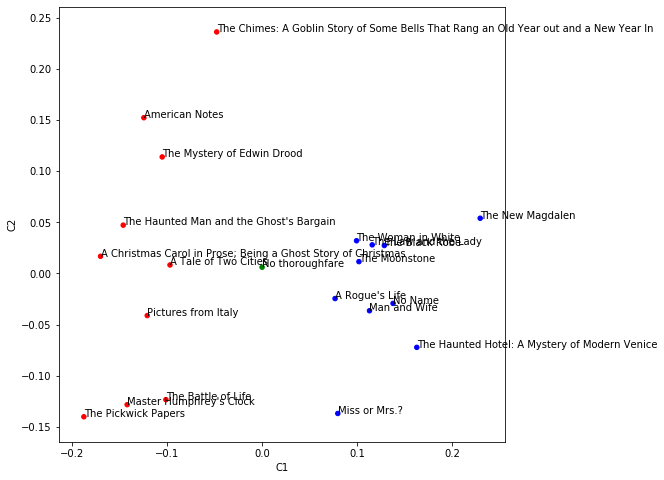

In [74]:
ax = textDf.plot(kind='scatter', x='C1', y='C2',c=c, figsize=(8,8))
for title, points in textDf.iterrows():
    ax.annotate(title, points)

- Stylometry usually uses 100 to 800 most frequent words
- Even the frequency of "an" can tell us a lot - can work out whether an author is British or American
- Sometimes removing pronouns can improve the accuracy - say a novel has a female or male protaganist, going to be swung either way depending on the novel. Might be a content signature

In [78]:
thoroughfareTags = nltk.pos_tag(word_tokenize(thoroughfare))

In [81]:
thoroughfareNoPronouns = [(token, tag) for token, tag in thoroughfareTags if tag != 'PRP']

In [82]:
thoroughfareNoPronounsTokens = [item[0] for item in thoroughfareNoPronouns]

In [84]:
thoroughfareCounts = nltk.FreqDist(thoroughfareNoPronounsTokens)

Rather than using scikit learnm you could put this in a data frame and use pca again to transform it


In [95]:
links = linkage(textDf, method='ward')

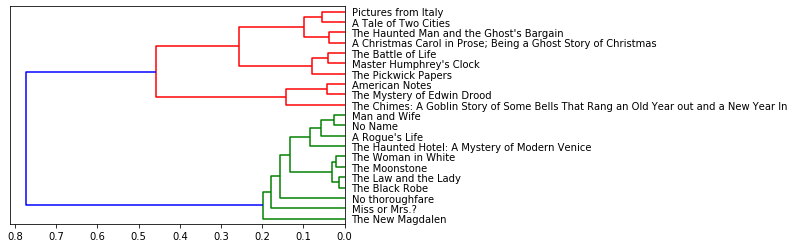

In [101]:
_ = dendrogram(links, labels=allTitles, orientation='left')

Style is like an extension of content, some say the other way around